# Regresión básica con scikit-learn

Debemos aplicar la regresión cuando queremos crear un modelo para predecir cantidades. 

Quizá el método de regresión más sencillo y conocido sea el de los mínimos cuadrados. Esta es una técnica de regresión lineal. En scikit-learn, está implementado en la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a>

NOTA: La regresión lineal utilizando el método de los mínimos cuadrados es una técnica de análisis estadístico básico. Por eso, podemos encontrar también esta técnica implementada en otros paquetes Python como <a href="http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html">statmodels</a>. No obstante, al utilizar la implementación en scikit-learn usamos las interfaces y el estilo de interacción de una biblioteca de aprendizaje automático.    

## Un dataset de ejemplo

Vamos a utilizar un dataset ficticio (las magnitudes no pretenden ser realistas, es solo un ejemplo). El primero representa las ventas de vehículos de una empresa por años, junto con el PIB del país en ese año, la tasa de desempleo y el precio medio del combustible. 

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("sales.txt")
data.head()


,Unnamed: 0,years,sales,gdp,unempl
0,0,1990,3206,2.784180,301
1,1,1991,3780,3.263245,409
2,2,1992,2909,2.515199,300
3,3,1993,4048,3.433681,321
4,4,1994,3224,2.807687,343


En este caso, vemos una columna con un ordinal que no nos interesa. Podemos eliminarla (o excluirla con un parámetro de read_csv()) aunque tampoco nos molesta para nuestro análisis.

In [8]:
#para borrar una entrada de un diccionario
del data["Unnamed: 0"]

A continuación típicamente se visualizan los datos para entenderlos mejor, y para buscar posibles errores o valores nulos (en este caso no los hay).

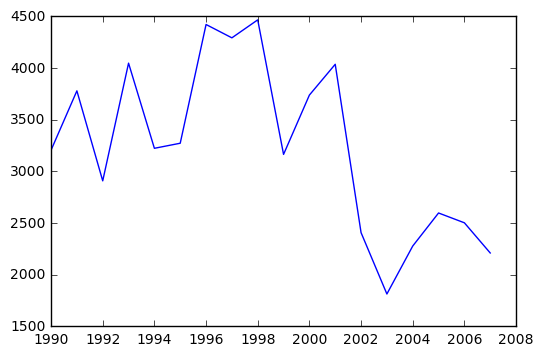

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data["years"], data["sales"])

## Visualización de relaciones entre datos

El siguiente paso lógico es tratar de buscar alguna evidencia de relación entre las variables. En nuestro caso:
* ventas (sales) es la variable objetivo de salida que queremos predecir. 
* El PIB (gdp) y el desempleo (unempl) son posibles variables de entrada o predictoras. 

Por ello, lo habitual es primero tratar de buscar alguna relación visual o alguna medida estadística. 

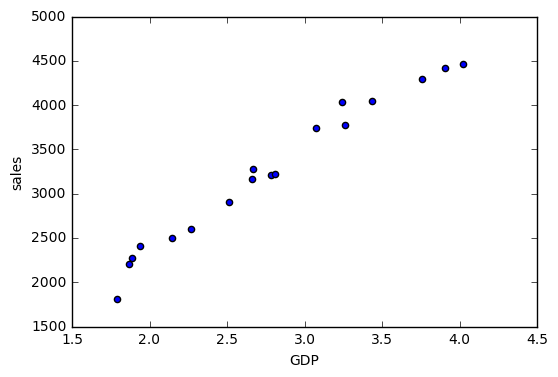

In [10]:
plt.scatter( data["gdp"], data["sales"])
plt.ylabel("sales")
plt.xlabel("GDP")

Vemos que en apariencia hay una relación lineal entre las variables.

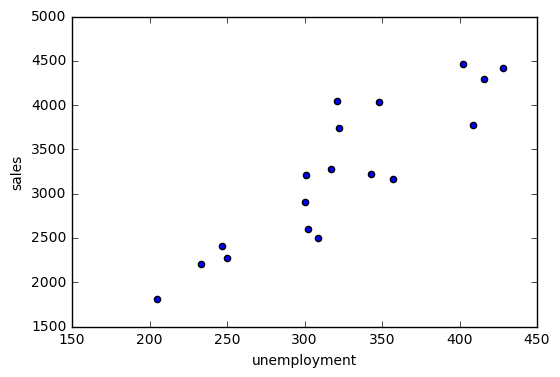

In [11]:
plt.scatter(data["unempl"], data["sales"])
plt.ylabel("sales")
plt.xlabel("unemployment")

En este segundo caso, también parece que hay una relación lineal entre las variables, por eso ambas pueden considerse candidatas. 

Hay otras medidas estadísticas que nos pueden servir también como indicio de la relación entre variables. Por ejemplo, la correlación y la covarianza.

In [6]:
gdp = data["gdp"]
unem = data["unempl"]
print gdp.corr(unem), gdp.cov(unem)

0.901711844983 41.7226154593


## El método de los mínimos cuadrados

Una vez que hemos visto una posible relación lineal entre la variable a predecir (ventas) y otras del conjunto de datos, tenemos la base para aplicar la regresión lineal.

In [16]:
from sklearn import linear_model
# Creamos un modelo de regresión "vacío":
clf = linear_model.LinearRegression()
# Entrenamos el modelo tomando todos los datos:
gdp = data["gdp"]
X = gdp[:, np.newaxis] # Necesario porque fit() espera una matriz.
y = data["sales"]
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

En este momento ya tenemos el modelo entrenado y podemos consultar sus parámetros, que en este caso es el coeficiente de la recta solamente.

In [17]:
clf.coef_

array([ 1134.18804425])

Ahora ya podemos hacer predicciones para valores concretos.

In [27]:
print clf.predict(5)

[ 5761.20614292]


Y podemos dibujar los puntos originales y la recta que es el modelo. Nótese que para la recta, predecimos valores con el modelo. 

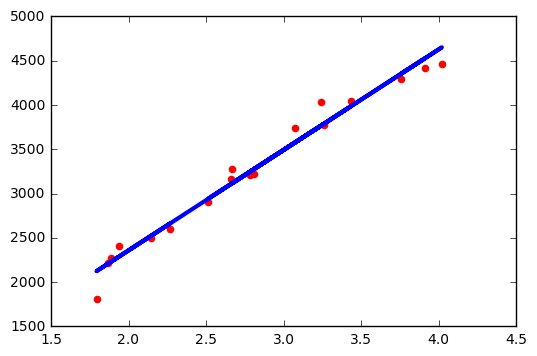

In [28]:
# Los puntos originales:
plt.scatter(X, y,  color='red')

# El modelo.
plt.plot(X, clf.predict(X), color='blue', linewidth=3)

Simplemente mirando el gráfico, parece que el modelo se ajusta bastante bien a los datos, como esperábamos. No obstante, a veces no es tan claro o necesitamos comparar modelos alternativos con diferenets variables. Para ello, necesitamos medidas para <b>evaluar</b> si el modelo es bueno. Podemos obtenerlo mediante score().

In [29]:
clf.score(X, y)

0.97394467130051454

Score en el caso de este método no es otra cosa que un <a href="http://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n">coeficiente de determinación</a> R$²$. Evalúa en qué medida el modelo explica los datos. El mejor valor es 1.0, por lo que en este caso tenemos un buen modelo.

NOTA: En este caso hemos llamado a score() con los mismos datos que hemos usado para entrenar el modelo. Sería más interesantes hacerlo con datos adicionales, para comprobar si el modelo <b>generaliza</b> bien para otros datos. 

## Utilizando más de una variable

Podemos tomar más de una variable de entrada, indexando el dataframe con una lista de los nombres de columnas:

In [30]:
X2 = data[["gdp", "unempl"]]

Y podemos crear otro modelo nuevo con esas dos variables.

In [31]:
clf2 = linear_model.LinearRegression()

# Entrenamos el modelo tomando dos variables:
clf2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

En este caso tenemos dos coeficientes, uno por variable.

In [32]:
print clf2.coef_

[  1.12068781e+03   1.67495206e-01]


El modelo es ahora más complejo, pero tenemos que analizar si añadir la variable ha añadido algo significativo a la calidad del modelo. ¿qué podríamos decir en este caso?

In [33]:
print clf2.score(X2, y)

0.973976393069


## Ejercicio: probando otros modelos

Hemos probado con una variable y con las dos. Nos faltaría por probar un tercer modelo alternativo, utilizando solamente la variable unempl. ¿La calidad del modelo es mejor que la de los dos anterioes? ¿con cuál nos quedaríamos?

En este caso solo teníamos dos variables, y hemos probado todos los modelos posibles. No obstante en general tendremos muchas variables (dimensionalidad alta) y es demasiado costoso probar todas las combinaciones. Por eso merece la pena observar si hay relaciones entre las variables de entrada antes de empezar a entrenar modelos. De este modo, podríamos descartar variables.

Si dibujamos las dos variables gdp y unempl ¿se observa relación entre ellas? ¿podemos utilizar alguna medida de relación para identificar si están relacionadas?

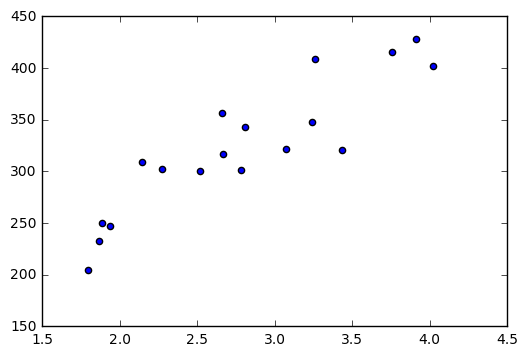

In [35]:
plt.scatter(data['gdp'],data['unempl'])

In [47]:
X3 = data[['unempl']]

In [48]:
clf3 = linear_model.LinearRegression()

In [49]:
clf3.fit(X3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
clf3.coef_

array([ 11.47277023])

In [52]:
clf3.score(X3,y) #este modelo no es muy bueno, ya que por lo menos el R^2 es menor al de los otros.

0.79623878019971783